### Analysis of the titanic dataset

#### Helper functions
Plotting functions to help us visualize the dataset.

In [18]:
def plotDistribution(df, var, target, **kwargs):
    row = kwargs.get('row', None)
    col = kwargs.get('col', None)
    fg = sns.FacetGrid(df, hue=target, aspect=4, row=row, col=col)
    fg.map(sns.kdeplot, var, shade=True)
    fg.set(xlim=(0, df[var].max()))
    facet.add_legend()

#### Data collection routine
In the data collection routine, a new column by name 'Title' is added to the dataframe, which holds the titles of people extracted from their names.  

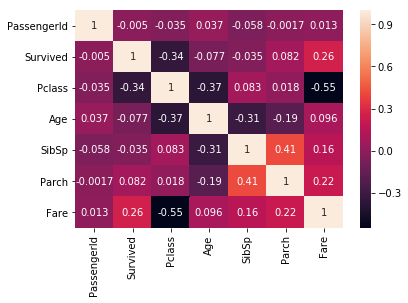

In [12]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

dfTrain = pd.read_csv('../input/train.csv')
dfTest  = pd.read_csv('../input/test.csv')

dataset = dfTrain.as_matrix()

# Get the columns of the dataset as numpy arrays.
dshape = np.shape(dataset)
survived = dataset[:,1]
pclass = dataset[:,2]
gender = dataset[:,4]
age = dataset[:,5]
numSibSp = dataset[:,6]
numParCh = dataset[:,7]
ticketNum = dataset[:,8]
fare = dataset[:,9]
cabin = dataset[:,10]
embarkation = dataset[:,11]

# Notes: By glancing at the correlation map, survival is highly correlated with 
# Sex, Pclass, Fare, Parch, Age in that order.
corr = dfTrain.corr()
sns.heatmap(dfTrain.corr(), xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True)

# Extracting titles.
titles = dfTrain['Name'].str.extract('(,)(.*?\.)',expand=True)[1]
cnt = 0
for title in titles:
    titles[cnt] = title.strip().strip('.')
    cnt += 1
dfTrain['Title'] = titles


#### Density plots
Following plots show the distribution of people who survived, with respect to a target attribute like Age.

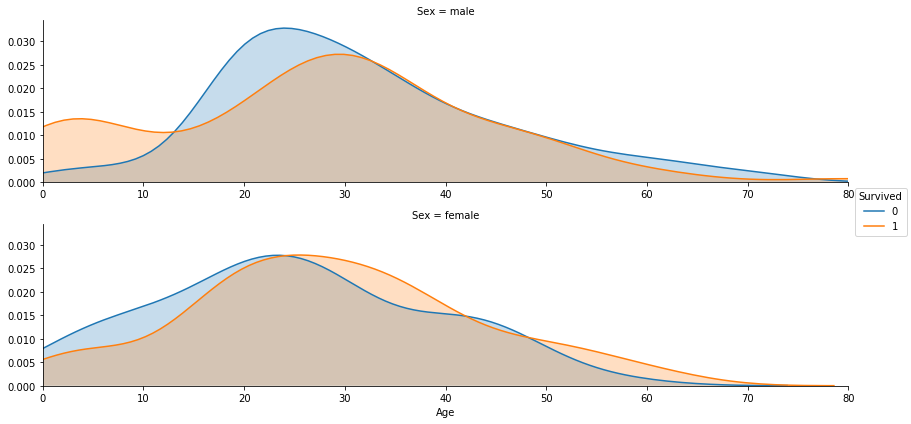

In [25]:
plotDistribution(dfTrain, var='Age', target='Survived', row='Sex')
